In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
import cufflinks as cf
from chart_studio import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
train = pd.read_csv('train.csv',na_values=['?','-999','Error','xxxxxxxx'])
train.head(10)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,NaN,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,NaN,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5
5,fffe43004900440036003300320035003300,Leslie Browder,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,NaN,...,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3
6,fffe43004900440031003100360037003900,Bridget Balog,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,...,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3
7,fffe4300490044003800300035003800,Herma Torgeson,42,M,4UJ1551,NaN,No Membership,2016-07-12,NaN,CID56614,...,429.11,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,5
8,fffe43004900440033003300330032003200,Pattie Helmers,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,NaN,...,191.07,18362.31,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3
9,fffe43004900440032003000340038003300,Shaquana Leech,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,NaN,...,97.31,19244.16,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,4


In [5]:
test = pd.read_csv('test.csv',na_values=['?','-999','Error','xxxxxxxx'])
test.head(10)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,NaN,...,12.0,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,NaN,...,11.0,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,NaN,...,18.0,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,NaN,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6.0,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website
5,fffe43004900440035003700330030003600,Evelyne Kinch,17,M,NBV1O8W,Town,Basic Membership,2016-12-04,Yes,CID53746,...,NaN,31.02,9948.54,16.0,577.830000,Yes,No,Yes,No Information Available,Poor Product Quality
6,fffe43004900440034003500360031003900,Gerry Metheny,17,M,HEUMD78,City,Premium Membership,2015-09-16,No,NaN,...,15.0,262.58,92825.88,6.0,NaN,Yes,No,No,Not Applicable,Reasonable Price
7,fffe430049004400320031003000,Annamaria Mistretta,17,M,DO1E4J6,NaN,Basic Membership,2017-09-23,Yes,CID8848,...,3.0,258.94,5993.19,15.0,602.600000,Yes,No,Yes,Solved in Follow-up,Too many ads
8,fffe43004900440034003100320030003300,Birgit Vince,58,F,IONC711,Town,Silver Membership,2015-06-04,No,NaN,...,14.0,408.74,1549.87,17.0,727.610000,No,Yes,No,Not Applicable,Too many ads
9,fffe4300490044003500320033003500,Franklin Lurry,22,M,C3B77NU,Town,No Membership,2015-10-14,Yes,CID60228,...,4.0,30.25,19363.60,NaN,528.660000,Yes,No,No,Not Applicable,Poor Website


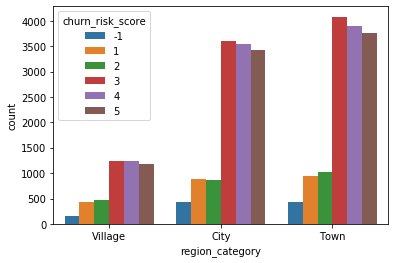

In [6]:
sb.countplot(x='region_category',hue='churn_risk_score',data=train)

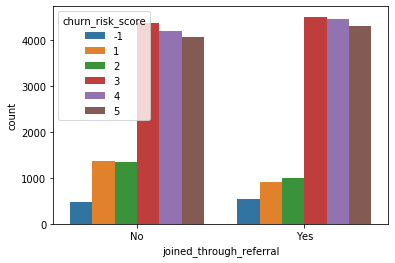

In [7]:
sb.countplot(x='joined_through_referral',hue='churn_risk_score',data=train)

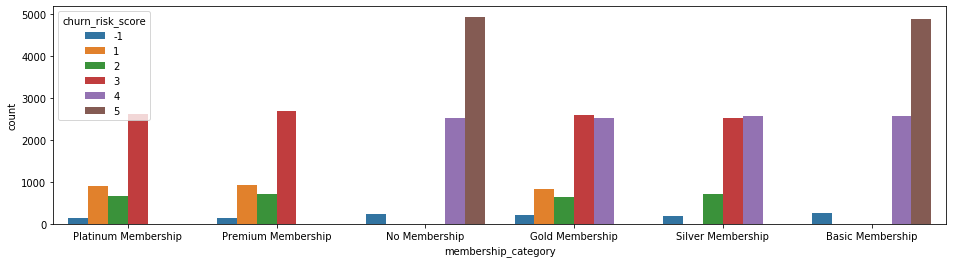

In [8]:
plt.figure(figsize=(16,4))
sb.countplot(x='membership_category',hue='churn_risk_score',data=train)

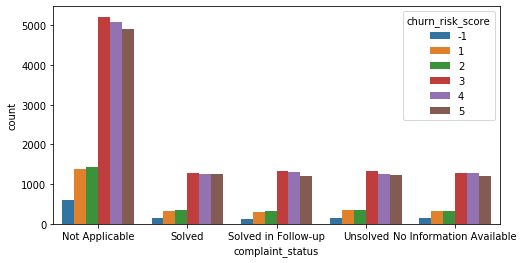

In [9]:
plt.figure(figsize=(8,4))
sb.countplot(x='complaint_status',hue='churn_risk_score',data=train)

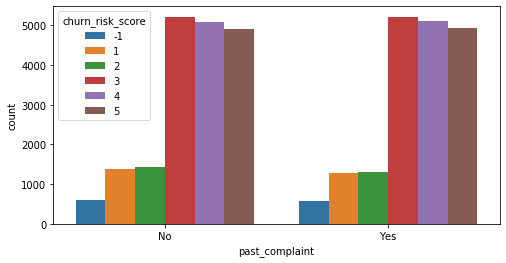

In [10]:
plt.figure(figsize=(8,4))
sb.countplot(x='past_complaint',hue='churn_risk_score',data=train)

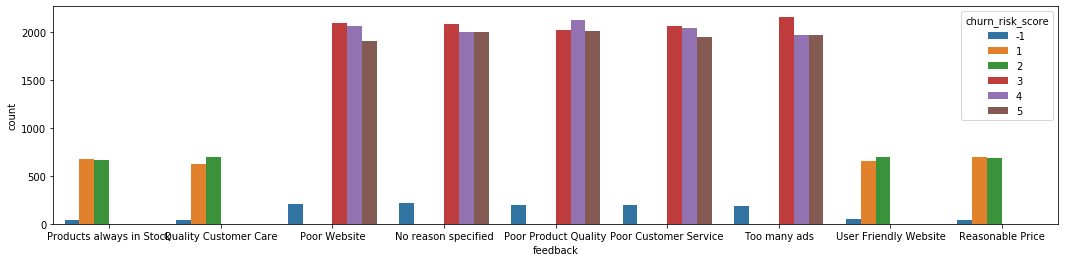

In [11]:
plt.figure(figsize=(18,4))
sb.countplot(x='feedback',hue='churn_risk_score',data=train)

In [12]:
train.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.002017,0.001531,-0.000473,-0.002156,0.000205,0.002360
days_since_last_login,-0.002017,1.000000,-0.090335,-0.017037,0.019261,0.000364,0.020951
avg_time_spent,0.001531,-0.090335,1.000000,0.020888,0.001820,-0.000648,-0.021052
avg_transaction_value,-0.000473,-0.017037,0.020888,1.000000,-0.132256,0.087950,-0.288636
avg_frequency_login_days,-0.002156,0.019261,0.001820,-0.132256,1.000000,-0.047645,0.164931
points_in_wallet,0.000205,0.000364,-0.000648,0.087950,-0.047645,1.000000,-0.264640
churn_risk_score,0.002360,0.020951,-0.021052,-0.288636,0.164931,-0.264640,1.000000


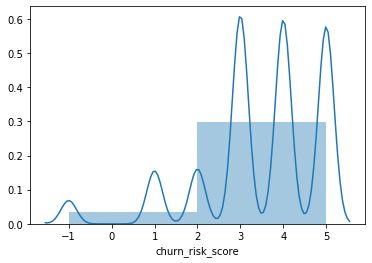

In [13]:
sb.distplot(train['churn_risk_score'],bins=2)

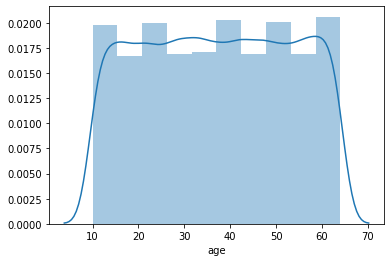

In [14]:
sb.distplot(train['age'],bins=10)

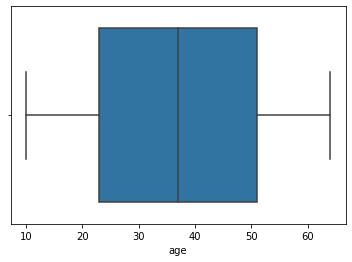

In [15]:
sb.boxplot(x='age',data=train)

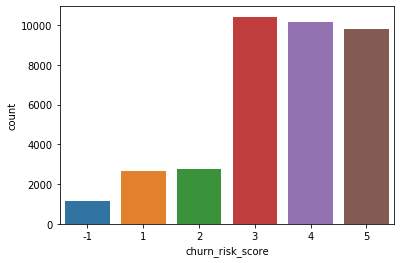

In [16]:
sb.countplot(train['churn_risk_score'])

In [17]:
df = train.append(test)

In [18]:
df.isnull().sum()

customer_id                         0
Name                                0
age                                 0
gender                              0
security_no                         0
region_category                  8376
membership_category                 0
joining_date                        0
joined_through_referral          8436
referral_id                     27300
preferred_offer_types             447
medium_of_operation              8357
internet_option                     0
last_visit_time                     0
days_since_last_login            3021
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days         5437
points_in_wallet                 5406
used_special_discount               0
offer_application_preference        0
past_complaint                      0
complaint_status                    0
feedback                            0
churn_risk_score                19919
dtype: int64

In [19]:
df.joined_through_referral.value_counts()

Yes    24332
No     24143
Name: joined_through_referral, dtype: int64

In [20]:
df.region_category.value_counts()

Town       21763
City       19529
Village     7243
Name: region_category, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56911 entries, 0 to 19918
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   56911 non-null  object 
 1   Name                          56911 non-null  object 
 2   age                           56911 non-null  int64  
 3   gender                        56911 non-null  object 
 4   security_no                   56911 non-null  object 
 5   region_category               48535 non-null  object 
 6   membership_category           56911 non-null  object 
 7   joining_date                  56911 non-null  object 
 8   joined_through_referral       48475 non-null  object 
 9   referral_id                   29611 non-null  object 
 10  preferred_offer_types         56464 non-null  object 
 11  medium_of_operation           48554 non-null  object 
 12  internet_option               56911 non-null  object 
 13  l

In [22]:
for i in df.columns:
    if df[i].dtype=='float64':
        df[i]=df[i].fillna(df[i].mean())
    else:
        df[i]=df[i].fillna(method='ffill')

In [23]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     1
preferred_offer_types           0
medium_of_operation             1
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [26]:
df.isnull().sum().sum()

0

In [25]:
df.fillna('Both',inplace=True)

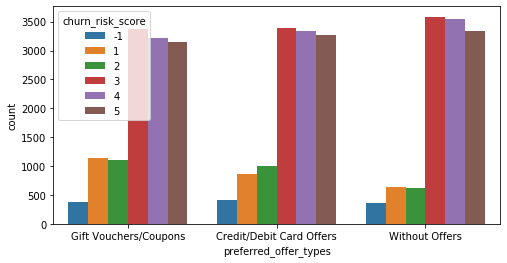

In [27]:
plt.figure(figsize=(8,4))
sb.countplot(x='preferred_offer_types',hue='churn_risk_score',data=train)

In [30]:
df['joining_year']=df['joining_date'].apply(lambda x:int(x.split('-')[0]))
df['joining_month']=df['joining_date'].apply(lambda x:int(x.split('-')[1]))
df['joining_day']=df['joining_date'].apply(lambda x:int(x.split('-')[2]))

In [31]:
df.drop('joining_date',axis=1, inplace = True)

In [32]:
def splittime(x):
    h,m,s = x.split(':')
    return int(h)*3600+int(m)*60+int(s)

In [33]:
df['last_visit_time'] = df['last_visit_time'].apply(lambda x: splittime(x))

In [34]:
df

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,joining_day
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,Both,Gift Vouchers/Coupons,...,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2.000000,2017,8,17
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,No,CID21329,Gift Vouchers/Coupons,...,686.563762,Yes,No,Yes,Solved,Quality Customer Care,1.000000,2017,8,28
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5.000000,2016,11,11
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,567.660000,No,Yes,Yes,Unsolved,Poor Website,5.000000,2016,10,29
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,CID3793,Credit/Debit Card Offers,...,663.060000,No,Yes,Yes,Solved,Poor Website,5.000000,2017,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,fffe43004900440035003600330037003800,Kraig Peele,12,M,2V0HA0O,Village,Gold Membership,No,CID44569,Without Offers,...,708.120000,No,Yes,No,Not Applicable,Poor Product Quality,3.463397,2015,1,25
19915,fffe43004900440032003900370037003100,Damaris Sabol,40,F,VJGQD6Q,Village,No Membership,Yes,CID45490,Without Offers,...,574.340000,No,Yes,No,Not Applicable,No reason specified,3.463397,2017,12,31
19916,fffe43004900440036003100310036003700,Loura Huckstep,55,M,ADE7LWA,Town,No Membership,No,CID45490,Credit/Debit Card Offers,...,564.300000,No,Yes,Yes,Unsolved,No reason specified,3.463397,2015,9,9
19917,fffe43004900440034003200330033003600,Sharita Clubb,17,F,A35KUBS,City,Silver Membership,Yes,CID37167,Credit/Debit Card Offers,...,606.340000,No,Yes,No,Not Applicable,Poor Website,3.463397,2016,4,17


In [35]:
df.drop(['customer_id','Name','security_no','referral_id'],inplace=True,axis=1)

In [36]:
pd.set_option('display.max_colwidth',500)

In [37]:
df1=pd.get_dummies(df,drop_first=True)

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [34]:
enc = LabelEncoder()

In [ ]:
strcol=df.select_dtypes(include=np.object)

In [ ]:
strcol.columns

In [35]:
df['gender'] = enc.fit_transform(df['gender'])
df['region_category'] = enc.fit_transform(df['region_category'])
df['membership_category'] = enc.fit_transform(df['membership_category'])
df['joined_through_referral'] = enc.fit_transform(df['joined_through_referral'])
df['preferred_offer_types'] = enc.fit_transform(df['preferred_offer_types'])
df['medium_of_operation'] = enc.fit_transform(df['medium_of_operation'])
df['internet_option'] = enc.fit_transform(df['internet_option'])
df['used_special_discount'] = enc.fit_transform(df['used_special_discount'])
df['offer_application_preference'] = enc.fit_transform(df['offer_application_preference'])
df['past_complaint'] = enc.fit_transform(df['past_complaint'])
df['complaint_status'] = enc.fit_transform(df['complaint_status'])
df['feedback'] = enc.fit_transform(df['feedback'])

In [45]:
test = df1[~df1['churn_risk_score'].isin([-1,1,2,3,4,5])]
test

,age,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_year,joining_month,...,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50,26370,12.000000,386.26,40721.44,7.000000,733.830000,3.463397,2015,11,...,0,0,0,1,0,0,0,0,0,0
1,41,80476,11.000000,37.80,9644.40,9.000000,726.000000,3.463397,2016,3,...,0,0,0,0,1,0,0,0,0,0
2,31,60039,18.000000,215.36,3693.25,21.000000,713.780000,3.463397,2017,3,...,1,0,0,0,0,0,0,0,0,0
3,64,53777,12.734904,44.57,36809.56,11.000000,744.970000,3.463397,2017,8,...,0,0,0,0,0,0,0,0,1,0
4,16,10673,6.000000,349.88,40675.86,8.000000,299.048351,3.463397,2015,5,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,12,1963,16.000000,103.57,46279.35,18.000000,708.120000,3.463397,2015,1,...,0,0,0,1,0,0,0,0,0,0
19915,40,28477,21.000000,63.19,23466.26,15.949553,574.340000,3.463397,2017,12,...,0,0,0,0,0,0,0,0,0,0
19916,55,33997,18.000000,68.72,17903.75,24.000000,564.300000,3.463397,2015,9,...,0,1,0,0,0,0,0,0,0,0
19917,17,79154,3.000000,119.54,14057.09,22.000000,606.340000,3.463397,2016,4,...,0,0,0,0,1,0,0,0,0,0


In [46]:
test.drop('churn_risk_score',axis=1, inplace = True)

In [47]:
train = df1[df1['churn_risk_score'].isin([-1,1,2,3,4,5])]
train

,age,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_year,joining_month,...,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,58082,17.0,300.630000,53005.25,17.000000,781.750000,2.0,2017,8,...,0,0,0,0,0,1,0,0,0,0
1,32,45493,16.0,306.340000,12838.38,10.000000,686.563762,1.0,2017,8,...,0,0,0,0,0,0,1,0,0,0
2,44,82401,14.0,516.160000,21027.00,22.000000,500.690000,5.0,2016,11,...,1,0,0,0,1,0,0,0,0,0
3,37,57470,11.0,53.270000,25239.56,6.000000,567.660000,5.0,2016,10,...,0,1,0,0,1,0,0,0,0,0
4,31,56804,20.0,113.130000,24483.66,16.000000,663.060000,5.0,2017,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,15245,2.0,-650.682759,27277.68,6.000000,639.510000,4.0,2017,9,...,0,0,0,0,0,0,0,0,0,0
36988,29,83911,13.0,-638.123421,11069.71,28.000000,527.990000,5.0,2016,6,...,0,0,1,0,0,0,0,0,0,0
36989,23,13825,12.0,154.940000,38127.56,15.949553,680.470000,4.0,2016,9,...,0,1,0,0,1,0,0,0,0,0
36990,53,35403,15.0,482.610000,2378.86,20.000000,197.264414,3.0,2017,6,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,r2_score

In [49]:
X = train.drop('churn_risk_score',axis=1)
y = train['churn_risk_score']
print(X.shape, y.shape)

(36992, 41) (36992,)


In [50]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3, random_state=10)

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_lrpred = lr.predict(X_test)

In [54]:
pd.crosstab(y_test,y_lrpred)

col_0,1.0,2.0,3.0,4.0,5.0
churn_risk_score,,,,,
-1.0,15,6,142,98,104
1.0,234,77,361,33,46
2.0,260,112,327,58,36
3.0,0,5,2546,329,265
4.0,1,8,844,1272,953
5.0,0,7,456,826,1677


In [55]:
confusion_matrix(y_test,y_lrpred)

array([[   0,   15,    6,  142,   98,  104],
       [   0,  234,   77,  361,   33,   46],
       [   0,  260,  112,  327,   58,   36],
       [   0,    0,    5, 2546,  329,  265],
       [   0,    1,    8,  844, 1272,  953],
       [   0,    0,    7,  456,  826, 1677]], dtype=int64)

In [56]:
r2_score(y_test,y_lrpred)

0.17512842705198117

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rd = RandomForestClassifier()
rd.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_rdpred = rd.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,f1_score

In [62]:
print(classification_report(y_test,y_rdpred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       365
         1.0       0.68      0.78      0.73       751
         2.0       0.75      0.69      0.72       793
         3.0       0.88      0.90      0.89      3145
         4.0       0.70      0.56      0.62      3078
         5.0       0.69      0.87      0.77      2966

    accuracy                           0.75     11098
   macro avg       0.61      0.64      0.62     11098
weighted avg       0.72      0.75      0.73     11098



In [65]:
print(f1_score(y_test,y_rdpred,average='macro'))

0.6212701624887139


In [66]:
from xgboost import XGBClassifier

In [68]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_xgpred = xg.predict(X_test)
print(classification_report(y_test,y_xgpred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       365
         1.0       0.69      0.78      0.73       751
         2.0       0.75      0.71      0.73       793
         3.0       0.88      0.91      0.89      3145
         4.0       0.69      0.62      0.65      3078
         5.0       0.70      0.84      0.76      2966

    accuracy                           0.75     11098
   macro avg       0.62      0.64      0.63     11098
weighted avg       0.73      0.75      0.74     11098



In [69]:
print(f1_score(y_test,y_xgpred,average='macro'))

0.6287577364437983


In [70]:
xg=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=119, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
xg.fit(X_train,y_train)
y_xgpred = xg.predict(X_test)
print(classification_report(y_test,y_xgpred))
print(f1_score(y_test,y_xgpred,average='macro'))

[09:56:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       365
         1.0       0.67      0.86      0.76       751
         2.0       0.80      0.65      0.72       793
         3.0       0.92      0.87      0.89      3145
         4.0       0.77      0.53      0.63      3078
         5.0       0.67      0.99      0.80      2966

    accuracy                           0.76     11098
   macro avg       0.64      0.65      0.63     11098
weighted avg       0.76      0.76      0.74     11098

0.6321442669729217


In [72]:
xg.fit(X,y)
test_xgpred = xg.predict(test)

[10:20:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [98]:
submission=pd.read_csv('test.csv',usecols=['customer_id'])
submission['churn_risk_score']=test_xgpred
submission.to_csv('submission.csv')

In [99]:
sub = pd.read_csv('submission.csv')
sub.drop('Unnamed: 0',axis =1, inplace = True)

In [100]:
sub

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3.0
1,fffe43004900440031003900370037003300,3.0
2,fffe43004900440034003800360037003000,4.0
3,fffe43004900440036003200370033003400,3.0
4,fffe43004900440035003000370031003900,5.0
...,...,...
19914,fffe43004900440035003600330037003800,4.0
19915,fffe43004900440032003900370037003100,5.0
19916,fffe43004900440036003100310036003700,5.0
19917,fffe43004900440034003200330033003600,4.0


In [101]:
sub.set_index(['churn_risk_score'],inplace=True)

In [102]:
sub.to_csv('submission.csv')

In [103]:
sub

,customer_id
churn_risk_score,
3.0,fffe43004900440031003700300030003400
3.0,fffe43004900440031003900370037003300
4.0,fffe43004900440034003800360037003000
3.0,fffe43004900440036003200370033003400
5.0,fffe43004900440035003000370031003900
...,...
4.0,fffe43004900440035003600330037003800
5.0,fffe43004900440032003900370037003100
5.0,fffe43004900440036003100310036003700
